## Imports


In [17]:
from collections import Counter
import csv
import re

import matplotlib.pyplot as plt
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import numpy as np

## Question 1

- Reads a text file (e.g., friends_ep624.txt). You can download similar files from: https://www.livesinabox.com/friends/scripts.shtml

- Tokenizes the text contained in the file into words, and saves this data in a file called "w_tokens.txt" with one word each line:


In [18]:
# Helper function also used in Programming Quiz 5
def tokenize_text(text):
    return np.array(word_tokenize(text))

In [19]:
# Read the text file
with open("given_files/friends_ep624.txt", "r") as f:
    text = f.read()

# Tokenize it
tokens = tokenize_text(text)

# Save the data in "w_tokens.csv"
with open("output/w_tokens.csv", "w", newline="") as f:
    writer = csv.writer(f)
    for token in tokens:
        writer.writerow([token])

## Question 2

Removes anything that are not words from the list.


In [20]:
# Helper function also used in Programming Quiz 5
def remove_non_words(word_tokens):
    tokens_without_non_words = []
    for word in word_tokens:
        if not re.search(r"[a-zA-z]", word):
            print(f"Removing a non-word: {word}")
            continue

        tokens_without_non_words.append(word)
    return np.array(tokens_without_non_words)

In [21]:
tokens_without_nonwords = remove_non_words(tokens)

Removing a non-word: :
Removing a non-word: !
Removing a non-word: :
Removing a non-word: ?
Removing a non-word: ,
Removing a non-word: .
Removing a non-word: ’
Removing a non-word: ‘
Removing a non-word: .
Removing a non-word: :
Removing a non-word: ,
Removing a non-word: ’
Removing a non-word: .
Removing a non-word: :
Removing a non-word: ,
Removing a non-word: ’
Removing a non-word: .
Removing a non-word: :
Removing a non-word: !
Removing a non-word: :
Removing a non-word: ,
Removing a non-word: ?
Removing a non-word: :
Removing a non-word: .
Removing a non-word: .
Removing a non-word: ’
Removing a non-word: ;
Removing a non-word: .
Removing a non-word: ,
Removing a non-word: ’
Removing a non-word: .
Removing a non-word: :
Removing a non-word: :
Removing a non-word: !
Removing a non-word: :
Removing a non-word: .
Removing a non-word: :
Removing a non-word: ’
Removing a non-word: .
Removing a non-word: :
Removing a non-word: ’
Removing a non-word: .
Removing a non-word: :
Removing a 

## Question 3

- Removes common stopwords (you can use the nltk's English stopwords list).
- Also removes people's names (e.g., I removed: Monica, Chandler, Joey, Richard, Phoebe, Ross, Rachel, Thompson, and Elizabeth, but there may be other names in other scripts), as well as some postfix words that didn't make it to the stopwords list (e.g., I removed: n't, 's, 're, 'm, na, gon).
  You can play around with these to see if the output from the next step makes sense.
  I only looked for weird ones in the most frequent ones, so I may have missed some others that didn't appear frequently.


In [22]:
# Helper function also used in Programming Quiz 5
def remove_stop_words(tokens_without_non_words, stop_words):
    tokens_without_stop_words = []
    for word in tokens_without_non_words:
        if word in stop_words or word.lower() in stop_words:
            print(f"Removing a stopword: {word}")
            continue

        tokens_without_stop_words.append(word)
    return np.array(tokens_without_stop_words)

In [23]:
stop_words = stopwords.words("english")

# Additional words to remove identified in assignment description and other weird ones
additional_words = [
    "Monica",
    "Chandler",
    "Joey",
    "Richard",
    "Phoebe",
    "Ross",
    "Rachel",
    "Thompson",
    "Elizabeth",
    "n't",
    "'s",
    "'re",
    "'m",
    "na",
    "gon",
    "I",
    "[",
    "]",
    "Scene",
]

# Add additional words to stopwords
stop_words = stop_words + additional_words

tokens_without_non_and_stop_words = remove_stop_words(
    tokens_without_nonwords, stop_words
)

Removing a stopword: Ross
Removing a stopword: that
Removing a stopword: is
Removing a stopword: the
Removing a stopword: most
Removing a stopword: Rachel
Removing a stopword: you
Removing a stopword: should
Removing a stopword: You
Removing a stopword: ve
Removing a stopword: a
Removing a stopword: of
Removing a stopword: Ross
Removing a stopword: you
Removing a stopword: didn
Removing a stopword: t
Removing a stopword: Chandler
Removing a stopword: s
Removing a stopword: the
Removing a stopword: Phoebe
Removing a stopword: Joey
Removing a stopword: how
Removing a stopword: are
Removing a stopword: you
Removing a stopword: gon
Removing a stopword: na
Removing a stopword: her
Removing a stopword: Chandler
Removing a stopword: It
Removing a stopword: is
Removing a stopword: to
Removing a stopword: be
Removing a stopword: I
Removing a stopword: am
Removing a stopword: her
Removing a stopword: to
Removing a stopword: her
Removing a stopword: I
Removing a stopword: m
Removing a stopword: t

## Question 4

- Generates a BoW for this corpus after removing the above words from the list, sorts them in descending order, and plots the 20 most frequently used words in the text file.
- Also, saves the entire ordered BoW into a file called "BoW.csv" which will have each word and its corresponding count/frequency separated by a comma on each line:


In [24]:
# Helper function to generate BoW and plot
def generate_BoW(tokens):
    counts = Counter(tokens)

    # Sort them based on counts high to low
    sorted_word_counts = sorted(counts.items(), key=lambda word: word[1], reverse=True)

    top_words = sorted_word_counts[:20]
    # Unpack words and counts from the top words
    words, counts = zip(*top_words)

    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Top 20 Most Frequent Words")
    plt.xticks(rotation=90)
    plt.show()

    return sorted_word_counts

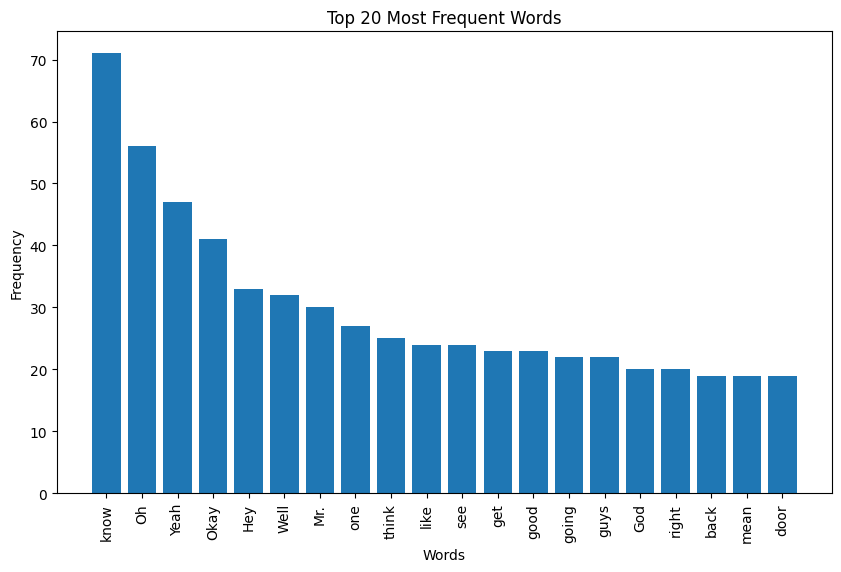

In [25]:
word_counts = generate_BoW(tokens_without_non_and_stop_words)

# Save to BoW.csv
with open("output/BoW.csv", "w", newline="") as f:
    writer = csv.writer(f)
    for word, count in word_counts:
        writer.writerow([word, count])

## Question 5

Tokenizes the original corpus into sentences, saves them as "s_tokens.txt" each sentence separated by dashed lines:


In [26]:
def sentence_tokenize_text(text):
    return np.array(sent_tokenize(text))

In [27]:
sentence_tokens = sentence_tokenize_text(text)

# Save the data in "s_tokens.txt"
with open("output/s_tokens.txt", "w") as f:
    for token in sentence_tokens:
        f.write(f"------\n{token}\n")

## Question 6

Extracts the sentences that include the words in the 20 most frequently used words, and saves these extracted sentences as "sentences_with_top20.txt" with dashed lines separating them as above.


In [28]:
def find_sentences_with_top_words(top_words, sentence_tokens):
    sentences_with_top_words = []

    for sentence in sentence_tokens:
        # If tokenized sentence contains a word in top 20, add it to list
        words_in_sentence = set(tokenize_text(sentence))
        if words_in_sentence.intersection(top_words):
            print(f"Matched sentence: {sentence}")
            sentences_with_top_words.append(sentence)

    return sentences_with_top_words

In [29]:
top_words = word_counts[:20]

# Create a set of top 20 words
top_words = set(word for word, _ in top_words)

sentences_with_top_words = find_sentences_with_top_words(top_words, sentence_tokens)

# Write to CSV
with open("output/sentences_with_top20.txt", "w") as f:
    for token in sentences_with_top_words:
        f.write(f"------\n{token}\n")

Matched sentence: Ross: God that is the most beautiful engagement ring ever!
Matched sentence: Rachel: Yeah?
Matched sentence: Well, you should know.
Matched sentence: You’ve bought like a billion of ‘em.
Matched sentence: Ross: Yeah, you didn’t get one.
Matched sentence: Chandler: Okay, well tonight’s the big night.
Matched sentence: Phoebe: Yeah!
Matched sentence: Joey: Okay listen, how are you gonna ask her?
Matched sentence: Chandler: It is going to be perfect.
Matched sentence: I’m going to get her a bottle of the champagne that she really loves; therefore knows how expensive it is.
Matched sentence: Chandler: Yeah.
Matched sentence: Monica: (entering) Hey!
Matched sentence: Ross: Hey!
Matched sentence: Chandler: Hey!
Matched sentence: Joey: Hey!
Matched sentence: Rachel: (entering) Hey!
Matched sentence: Chandler: Hey!
Matched sentence: Joey: Hey Rach!
Matched sentence: Rachel: Are any of you guys free tonight?
Matched sentence: Chandler: (glaring at her) Well, Monica and Chandle